# Tweets about eating disorders
## 01. Pre-processing and initial data cleaning

Loading data in dataframes.
There are 3 sets of data. In each set a different group of words has been used to collect the tweets by streaming:
- data1: anorexia, anorexic, dietary disorders, inappetence, feeding disorder, food problem, binge eating, anorectic
- data2: eating disorders, bulimia, food issues, loss of appetite, food issue, food hater, eat healthier, disturbed eating habits, abnormal eating habits, abnormal eating habit
- data3: binge-vomit syndrome, bingeing, bulimarexia, anorexic skinny, eating healthy

The data was collected between October 20, 2020 and December 26, 2020 using <a href="https://github.com/congosto/t-hoarder" target="_blank">t-hoarder</a>.
 

In [2]:
import os
import pandas as pd

data1_0 = pd.read_csv('streaming_ed-data1_0.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data1_1 = pd.read_csv('streaming_ed-data1_1.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data1_2 = pd.read_csv('streaming_ed-data1_2.txt',  encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data1_3 = pd.read_csv('streaming_ed-data1_3.txt',  encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data2_0 = pd.read_csv('streaming_ed-data2_0.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data2_1 = pd.read_csv('streaming_ed-data2_1.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data2_2 = pd.read_csv('streaming_ed-data2_2.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data2_3 = pd.read_csv('streaming_ed-data2_3.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data3_0 = pd.read_csv('streaming_ed-data3_0.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)
data3_1 = pd.read_csv('streaming_ed-data3_1.txt', encoding='utf8', sep="\t", header = None, error_bad_lines=False)

b'Skipping line 11759: expected 30 fields, saw 43\nSkipping line 18793: expected 30 fields, saw 40\n'
b'Skipping line 55842: expected 30 fields, saw 40\nSkipping line 60390: expected 30 fields, saw 40\nSkipping line 60890: expected 30 fields, saw 40\n'
b'Skipping line 73925: expected 30 fields, saw 40\n'
b'Skipping line 102016: expected 30 fields, saw 40\nSkipping line 104827: expected 30 fields, saw 40\nSkipping line 108727: expected 30 fields, saw 43\nSkipping line 108732: expected 30 fields, saw 43\nSkipping line 108740: expected 30 fields, saw 43\nSkipping line 108789: expected 30 fields, saw 33\nSkipping line 120270: expected 30 fields, saw 40\nSkipping line 127724: expected 30 fields, saw 43\nSkipping line 129613: expected 30 fields, saw 40\n'
C:\Users\MICROSOFT\Anaconda3\envs\tfm\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compi

We created a function to process all the dataframes by adding the names to the different columns and removing strings that do not give us information to leave the content clean.

From all the information received, data are selected that are useful for analysing the context of the tweet:

- id.tweet: tweet identifier. It is a growing number that is assigning Twitter sequentially to each message.
- date: date and GMT time of the tweet.
- @author: username of the tweet's author.
- text: text of the tweet.
- app: application from which the tweet has been published.
- id.author: author's identifier. It is a growing number that is assigned to Twitter users as they are discharged.
- followers: number of followers at the time of publication.
- following: number of users followed at the time of publication.
- statuses: number of tweets published previously.
- location: location declared in the user profile.
- urls: link if the tweet contains a URL, otherwise the value None is stored.
- geolocation: coordinates if the tweet is geolocated, otherwise None is stored.
- name: name provided by the user.
- description: description of the user.
- url_media: URL if the tweet contains multimedia information, otherwise the value None is stored.
- type.media: type of multimedia information (photo, video,.), in case it does not exist, its value is None.
- quoted: original tweet that has been quoted.
- relation: RT, reply, quote or None.
- replied_id: tweet replied.
- user.replied: user replied.
- retweeted_id: id of tweet replied.
- user.retweeted: user retweeted.
- quoted_id: id of tweet quoted.
- user.quoted: user quoted.
- first.HT: first hasthag found on the tweet.
- lang: language of tweet.
- create_at: date of creation of the tweeting user account.
- verified: information on whether the account is verified or not.
- avatar: avatar of user account.
- link: link to the tweet.

Some data such as location, name and bio may contain line breaks or tabs. To avoid conflicts with the delimiters, the tabs and line breaks in these data are filtered out.

In [3]:
def pre_df(data, group):
    data.columns = ["id_tweet","date","author","text","app","id_user","followers","following","statuses","location","urls","geolocation","name","description",
                             "url_media","type_media","quoted","relation","replied_id","user_replied","retweeted_id","user_retweeted","quoted_id","user_quoted","first_HT",
                             "lang","created_at","verified","avatar","link"]
    data['app'] = data['app'].astype('str').map(lambda x: x.lstrip('via='))
    data['id_user'] = data['id_user'].astype('str').map(lambda x: x.lstrip('id='))
    data['followers'] = data['followers'].astype('str').map(lambda x: x.lstrip('followers='))
    data['following'] = data['following'].astype('str').map(lambda x: x.lstrip('following='))
    data['statuses'] = data['statuses'].astype('str').map(lambda x: x.lstrip('statuses='))
    data['location'] = data['location'].astype('str').map(lambda x: x.lstrip('loc='))
    data['stream_group'] = group

In [4]:
pre_df(data1_0, 1)
pre_df(data1_1, 1)
pre_df(data1_2, 1)
pre_df(data1_3, 1)
pre_df(data2_0, 2)
pre_df(data2_1, 2)
pre_df(data2_2, 2)
pre_df(data2_3, 2)
pre_df(data3_0, 3)
pre_df(data3_1, 3)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300
#data2_1.info(memory_usage="deep")

We unite all the data sets into one.

In [6]:
objs = [data1_0, data1_1, data1_2, data1_3, data2_0, data2_1, data2_2, data2_3, data3_0, data3_1]

data_tot = pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=True,
    copy=True
)

In [7]:
data_tot.shape

(1085957, 31)

We have collected 1,085,957 tweets in total.

We count how many tweets are original and how many are retuits, quotes or responses to other tweets.

In [8]:
data_tot.groupby('relation')['text'].count()

relation
2020-11-13 19:43:31         1
False                      15
None                   218993
RT                     404882
True                        1
quote                  260223
reply                  201776
Name: text, dtype: int64

We detected 17 tweets that were not stored correctly and deleted them.

In [9]:
data_tot_cl = data_tot.query('relation != "False" and relation != "True" and relation != "2020-11-13 19:43:31"')

In [10]:
data_tot_cl.groupby('relation')['text'].count()

relation
None     218993
RT       404882
quote    260223
reply    201776
Name: text, dtype: int64

In [11]:
data_tot_cl.shape

(1085940, 31)

We then calculate the usage memory of the dataframe and try to optimize it by performing the following tasks
- Converting the numerical columns to numbers.
- Convert the dates to datetime.
- Convert the rest of the objects into categories.

Thanks to all these steps, we reduced the original dataframe from 2.7GB to 1.1GB.

In [12]:
def usageForType(df):
    for ctype in ['float','float64','int64','int','object','datetime','category']:
        columnType = df.select_dtypes(include=[ctype])
        meanMemoryUsage = columnType.memory_usage(deep=True).mean()
        meanMemoryUsageMB = meanMemoryUsage / 1024 ** 2
        print("Memory usage for type ",ctype , " : {:0.5f} MB".format(meanMemoryUsageMB))

In [13]:
data_tot_cl = data_tot_cl[data_tot_cl['date'].notna()]

In [14]:
data_tot_cl.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085898 entries, 0 to 1085956
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id_tweet        1085898 non-null  object
 1   date            1085898 non-null  object
 2   author          1085898 non-null  object
 3   text            1085898 non-null  object
 4   app             1085898 non-null  object
 5   id_user         1085898 non-null  object
 6   followers       1085898 non-null  object
 7   following       1085898 non-null  object
 8   statuses        1085898 non-null  object
 9   location        1085898 non-null  object
 10  urls            1085898 non-null  object
 11  geolocation     1085898 non-null  object
 12  name            1085835 non-null  object
 13  description     1085885 non-null  object
 14  url_media       1085895 non-null  object
 15  type_media      1085895 non-null  object
 16  quoted          1085895 non-null  object
 17  relation

In [15]:
usageForType(data_tot_cl)

Memory usage for type  float  : 8.28474 MB
Memory usage for type  float64  : 8.28474 MB
Memory usage for type  int64  : 8.28474 MB
Memory usage for type  int  : 8.28474 MB
Memory usage for type  object  : 88.00062 MB
Memory usage for type  datetime  : 8.28474 MB
Memory usage for type  category  : 8.28474 MB


In [16]:
data_tot_cl['id_tweet'].head(1)

0    1318513897826123776
Name: id_tweet, dtype: object

In [17]:
data_tot_cl.loc[:,'id_tweet'] = pd.to_numeric(data_tot_cl.loc[:,'id_tweet'], errors='coerce')
data_tot_cl.loc[:,'id_user'] = pd.to_numeric(data_tot_cl.loc[:,'id_user'], errors='coerce')
data_tot_cl.loc[:,'followers'] = pd.to_numeric(data_tot_cl.loc[:,'followers'], errors='coerce')
data_tot_cl.loc[:,'following'] = pd.to_numeric(data_tot_cl.loc[:,'following'], errors='coerce')
data_tot_cl.loc[:,'replied_id'] = pd.to_numeric(data_tot_cl.loc[:,'replied_id'], errors='coerce')
data_tot_cl.loc[:,'retweeted_id'] = pd.to_numeric(data_tot_cl.loc[:,'retweeted_id'], errors='coerce')
data_tot_cl.loc[:,'quoted_id'] = pd.to_numeric(data_tot_cl.loc[:,'quoted_id'], errors='coerce')
data_tot_cl.loc[:,'user_replied'] = pd.to_numeric(data_tot_cl.loc[:,'user_replied'], errors='coerce')
data_tot_cl.loc[:,'user_retweeted'] = pd.to_numeric(data_tot_cl.loc[:,'user_retweeted'], errors='coerce')
data_tot_cl.loc[:,'user_quoted'] = pd.to_numeric(data_tot_cl.loc[:,'user_quoted'], errors='coerce')

In [18]:
data_tot_cl['date'] = pd.to_datetime(data_tot_cl['date'], errors='coerce', infer_datetime_format=True)
data_tot_cl['created_at'] = pd.to_datetime(data_tot_cl['created_at'], errors='coerce', infer_datetime_format=True)

In [19]:
for col in data_tot_cl.columns:            
       if "object" in str(data_tot_cl[col].dtype):
            data_tot_cl[col] = data_tot_cl[col].astype('category')

In [20]:
data_tot_cl.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085898 entries, 0 to 1085956
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   id_tweet        1085895 non-null  float64       
 1   date            1085895 non-null  datetime64[ns]
 2   author          1085898 non-null  category      
 3   text            1085898 non-null  category      
 4   app             1085898 non-null  category      
 5   id_user         1085877 non-null  float64       
 6   followers       1085877 non-null  float64       
 7   following       1085878 non-null  float64       
 8   statuses        1085898 non-null  category      
 9   location        1085898 non-null  category      
 10  urls            1085898 non-null  category      
 11  geolocation     1085898 non-null  category      
 12  name            1085835 non-null  category      
 13  description     1085885 non-null  category      
 14  url_media       10

In [21]:
pd.set_option('float_format', '{:.0f}'.format)

We make a cross between the columns 'id.tweet' and 'retweeted_id' so that we remove all the tweets that are retuits of already existing tweets.

In [22]:
id_tweets = set(data_tot_cl['id_tweet'].unique())
data_tot_cl["origtweetishere"] = data_tot_cl['retweeted_id'].map(lambda x : True if x in id_tweets else False) 

In [23]:
data_tot_cl.query('relation == "RT"')['id_tweet'].count()

404882

In [24]:
data_tot_cl.groupby('origtweetishere')['id_tweet'].count()

origtweetishere
False    743272
True     342623
Name: id_tweet, dtype: int64

Of 404,882 retuits, 342,623 belong to tuits already stored in the dataframe.

In [25]:
data_tot_cl = data_tot_cl.query('origtweetishere == False')

In [26]:
data_tot_cl = data_tot_cl.drop(['origtweetishere'], axis=1)

In [27]:
data_tot_cl.shape

(743275, 31)

We now eliminate possible repeated tweets since, initially, we unified 3 data sets that could have common tweets.

In [28]:
data_tot_cl = data_tot_cl.drop_duplicates()

In [29]:
data_tot_cl = data_tot_cl.loc[~data_tot_cl['text'].duplicated()]

In [30]:
data_tot_cl = data_tot_cl.loc[~data_tot_cl['id_tweet'].duplicated()]

In [31]:
data_tot_cl = data_tot_cl.query('lang == "en"')

In [32]:
print('\nTweets info:')
print(data_tot_cl['text'].agg(['nunique','count','size']))
print('\nUsers info:')
print(data_tot_cl['id_user'].agg(['nunique','count','size']))
print('\nGroup info:')
print(data_tot_cl['stream_group'].agg(['nunique','count','size']))
print('\nGroup by group:')
print(data_tot_cl.groupby('stream_group')['id_tweet'].count())
print('\nDetecting duplicates by id_tweet:')
print(data_tot_cl['id_tweet'].agg(['nunique','count','size']))


Tweets info:
nunique    494025
count      494025
size       494025
Name: text, dtype: int64

Users info:
nunique    349634
count      494025
size       494025
Name: id_user, dtype: int64

Group info:
nunique         3
count      494025
size       494025
Name: stream_group, dtype: int64

Group by group:
stream_group
1    179217
2    176976
3    137832
Name: id_tweet, dtype: int64

Detecting duplicates by id_tweet:
nunique    494025
count      494025
size       494025
Name: id_tweet, dtype: int64


In [33]:
data_tot_cl = data_tot_cl.reset_index()

In [34]:
tweets = data_tot_cl.copy()

In [35]:
tweets['text_orig'] = data_tot_cl['text'].map(str)

In [36]:
tweets = tweets.drop(['index'], axis=1)

In [37]:
tweets_orig = tweets.copy()

In [38]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

import preprocessor as p
tweets['hashtag'] = tweets['text_orig'].apply(lambda x: re.findall(r"#(\w+)", x))

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

tweets['text'] = tweets.apply(preprocess_tweet, axis=1)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MICROSOFT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MICROSOFT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


In [39]:
tweets['hashtag'].head(10)

0              [BBCPanorama]
1                         []
2                         []
3    [anorexia, BodyofWater]
4                         []
5                         []
6                         []
7                         []
8                         []
9                         []
Name: hashtag, dtype: object

In [40]:
def preprocess_data(data):
    #Removes Numbers
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()
 
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]
    
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

pre_tweets = preprocess_data(tweets['text'])
tweets['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
tweets['text'] = tweets['text'].apply(lambda x: [item for item in \
                                    x if item not in stop_words])

In [41]:
tweets['hashtag'].dropna(inplace=True)

In [42]:
tweets2 = tweets.copy()

tweets2['hashtag'].head(3)
tweets2 = tweets2.reset_index(drop=True)
tweets2['hashtag'].head(3)

0    [BBCPanorama]
1               []
2               []
Name: hashtag, dtype: object

Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\MICROSOFT\Anaconda3\envs\tfm\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


(494025, 33)


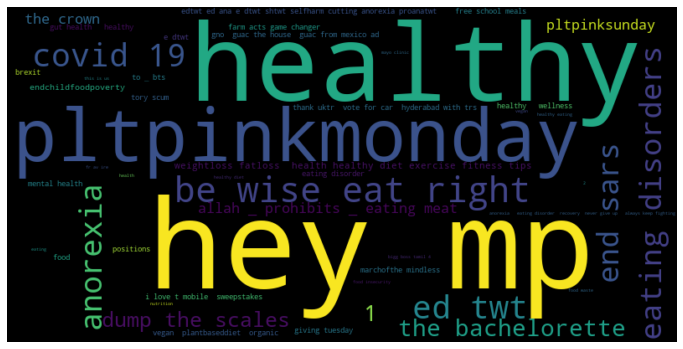

In [43]:
from ekphrasis.classes.segmenter import Segmenter

# segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")
a = []

#tweets2 = tweets.copy()
#tweets['hashtag'] = tweets['hashtag'].dropna(inplace=True)
tweets = tweets.reset_index(drop=True)
print(tweets.shape)

for i in range(len(tweets)):
    if tweets['hashtag'][i] != a:
        listToStr1 = ' '.join([str(elem) for elem in \
                                       tweets['hashtag'][i]])
        tweets.loc[i,'Segmented#'] = seg_tw.segment(listToStr1)

#Frequency of words
fdist = FreqDist(tweets['Segmented#'])
#WordCloud
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
tweets.to_csv('tweets.csv', encoding='utf-8')

In [60]:
fdist.pprint(10)

FreqDist({'hey mp': 684, 'healthy': 501, 'pltpinkmonday': 338, 'be wise eat right': 337, 'covid 19': 274, 'ed twt': 272, 'anorexia': 252, 'eating disorders': 239, 'end sars': 226, 'the bachelorette': 208, ...})


In [ ]:
dff.head(10)